### Name: Onkar Santosh Potdar
### Covid Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read source dataset.

In [2]:
df_state = pd.read_csv("StatewiseTestingDetails.csv") 
df_covid = pd.read_csv("covid_19_india.csv")
df_vacc = pd.read_csv("covid_vaccine_statewise.csv")

In [3]:
df_state.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [4]:
df_state.shape

(16336, 5)

In [5]:
df_covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [6]:
df_covid.shape

(18110, 9)

In [7]:
df_vacc.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [8]:
df_vacc.shape

(7845, 24)

In [9]:
df_vacc.info(),df_state.info(),df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

(None, None, None)

### 2. Data Cleaning and removing duplicate state/UT.

In [10]:
df_state['State'].unique(), df_state['State'].nunique()

(array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
        'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
        'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
        'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
        'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
        'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
        'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
        'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
        'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
       dtype=object),
 36)

In [11]:
df_state.columns

Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object')

In [12]:
df_vacc['State'].unique(), df_vacc['State'].nunique()

(array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
        'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
        'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
        'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
        'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
        'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
        'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
        'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
        'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
       dtype=object),
 37)

In [13]:
df_covid['State/UnionTerritory'].unique(), df_covid['State/UnionTerritory'].nunique()

(array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
        'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
        'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
        'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
        'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
        'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
        'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
        'Tripura', 'Nagaland', 'Meghalaya',
        'Dadra and Nagar Haveli and Daman and Diu',
        'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
        'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****',
        'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka',
        'Maharashtra***'], dtype=object),
 46)

In [14]:
dict(zip(df_vacc['State'].unique(), df_vacc['State'].unique()))

{'India': 'India',
 'Andaman and Nicobar Islands': 'Andaman and Nicobar Islands',
 'Andhra Pradesh': 'Andhra Pradesh',
 'Arunachal Pradesh': 'Arunachal Pradesh',
 'Assam': 'Assam',
 'Bihar': 'Bihar',
 'Chandigarh': 'Chandigarh',
 'Chhattisgarh': 'Chhattisgarh',
 'Dadra and Nagar Haveli and Daman and Diu': 'Dadra and Nagar Haveli and Daman and Diu',
 'Delhi': 'Delhi',
 'Goa': 'Goa',
 'Gujarat': 'Gujarat',
 'Haryana': 'Haryana',
 'Himachal Pradesh': 'Himachal Pradesh',
 'Jammu and Kashmir': 'Jammu and Kashmir',
 'Jharkhand': 'Jharkhand',
 'Karnataka': 'Karnataka',
 'Kerala': 'Kerala',
 'Ladakh': 'Ladakh',
 'Lakshadweep': 'Lakshadweep',
 'Madhya Pradesh': 'Madhya Pradesh',
 'Maharashtra': 'Maharashtra',
 'Manipur': 'Manipur',
 'Meghalaya': 'Meghalaya',
 'Mizoram': 'Mizoram',
 'Nagaland': 'Nagaland',
 'Odisha': 'Odisha',
 'Puducherry': 'Puducherry',
 'Punjab': 'Punjab',
 'Rajasthan': 'Rajasthan',
 'Sikkim': 'Sikkim',
 'Tamil Nadu': 'Tamil Nadu',
 'Telangana': 'Telangana',
 'Tripura': 'Trip

In [15]:
df_state['State'].unique(),df_state['State'].nunique()

(array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
        'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
        'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
        'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
        'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
        'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
        'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
        'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
        'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
       dtype=object),
 36)

In [16]:
state_correction_dict = {
    'Bihar****': 'Bihar',
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Daman & Diu': 'Dadra and Nagar Haveli and Daman and Diu',
    'Madhya Pradesh***': 'Madhya Pradesh',
    'Maharashtra***': 'Maharashtra',
    'Karanataka':'Karnataka',
    'Himanchal Pradesh':'Himachal Pradesh'
}

In [17]:
def state_correction(state):
  try:
    return state_correction_dict[state]
  except:
    return state

In [18]:
df_covid['State/UnionTerritory'] = df_covid['State/UnionTerritory'].apply(state_correction)

In [19]:
df_vacc['Updated On'] = pd.to_datetime(df_vacc['Updated On'])
df_state['Date'] = pd.to_datetime(df_state['Date'])
df_covid['Date'] = pd.to_datetime(df_covid['Date'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/01/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/01/2021' in DD/MM/YYYY format. Provide format or specif

In [20]:
df_state.columns, df_state.shape

(Index(['Date', 'State', 'TotalSamples', 'Negative', 'Positive'], dtype='object'),
 (16336, 5))

In [21]:
df_covid.columns, df_covid.shape

(Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
        'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
        'Deaths', 'Confirmed'],
       dtype='object'),
 (18110, 9))

In [22]:
df = df_covid.merge(df_state, left_on = ["State/UnionTerritory","Date"], right_on=["State","Date"], how='left')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18111 entries, 0 to 18110
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       18111 non-null  int64         
 1   Date                      18111 non-null  datetime64[ns]
 2   Time                      18111 non-null  object        
 3   State/UnionTerritory      18111 non-null  object        
 4   ConfirmedIndianNational   18111 non-null  object        
 5   ConfirmedForeignNational  18111 non-null  object        
 6   Cured                     18111 non-null  int64         
 7   Deaths                    18111 non-null  int64         
 8   Confirmed                 18111 non-null  int64         
 9   State                     15945 non-null  object        
 10  TotalSamples              15945 non-null  float64       
 11  Negative                  6866 non-null   object        
 12  Positive          

In [24]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,State,TotalSamples,Negative,Positive
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,NaN,NaN,NaN,NaN
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,NaN,NaN,NaN,NaN
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,NaN,NaN,NaN,NaN
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,NaN,NaN,NaN,NaN
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18106,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353,NaN,NaN,NaN,NaN
18107,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660,NaN,NaN,NaN,NaN
18108,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462,NaN,NaN,NaN,NaN
18109,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812,NaN,NaN,NaN,NaN


In [25]:
df_state

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
16331,2021-08-06,West Bengal,15999961.0,NaN,NaN
16332,2021-08-07,West Bengal,16045662.0,NaN,NaN
16333,2021-08-08,West Bengal,16092192.0,NaN,NaN
16334,2021-08-09,West Bengal,16122345.0,NaN,NaN


In [26]:
df.drop(['Time','Sno','ConfirmedIndianNational','ConfirmedForeignNational'],inplace =True, axis = 1)

### 3. Calculating daily active Covid-19 cases daywise

In [27]:
df['ActiveCases'] = df['Confirmed'] - (df['Cured'] + df['Deaths'])

### 4. Deleting NaN value columns

In [28]:
df.isna().sum()

Date                        0
State/UnionTerritory        0
Cured                       0
Deaths                      0
Confirmed                   0
State                    2166
TotalSamples             2166
Negative                11245
Positive                12596
ActiveCases                 0
dtype: int64

In [29]:
df=df[['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed', 'ActiveCases', 'State','TotalSamples']]

In [30]:
df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases,State,TotalSamples
0,2020-01-30,Kerala,0,0,1,1,NaN,NaN
1,2020-01-31,Kerala,0,0,1,1,NaN,NaN
2,2020-02-01,Kerala,0,0,2,2,NaN,NaN
3,2020-02-02,Kerala,0,0,3,3,NaN,NaN
4,2020-02-03,Kerala,0,0,3,3,NaN,NaN
...,...,...,...,...,...,...,...,...
18106,2021-08-11,Telangana,638410,3831,650353,8112,NaN,NaN
18107,2021-08-11,Tripura,77811,773,80660,2076,NaN,NaN
18108,2021-08-11,Uttarakhand,334650,7368,342462,444,NaN,NaN
18109,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545,NaN,NaN


In [31]:
df1=df.sort_values(['State/UnionTerritory','Date'],ignore_index=True)
df1

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases,State,TotalSamples
0,2020-03-26,Andaman and Nicobar Islands,0,0,1,1,NaN,NaN
1,2020-03-27,Andaman and Nicobar Islands,0,0,1,1,NaN,NaN
2,2020-03-28,Andaman and Nicobar Islands,0,0,6,6,NaN,NaN
3,2020-03-29,Andaman and Nicobar Islands,0,0,9,9,NaN,NaN
4,2020-03-30,Andaman and Nicobar Islands,0,0,9,9,NaN,NaN
...,...,...,...,...,...,...,...,...
18106,2021-08-07,West Bengal,1503535,18202,1532379,10642,West Bengal,16045662.0
18107,2021-08-08,West Bengal,1504326,18217,1533128,10585,West Bengal,16092192.0
18108,2021-08-09,West Bengal,1505089,18229,1533803,10485,West Bengal,16122345.0
18109,2021-08-10,West Bengal,1505808,18240,1534360,10312,West Bengal,16162814.0


### 5. Calculating daily values of Confirmed, Cured and Deaths cases by using shift function.

In [32]:
df1["Cured_dsh"]=df1["Cured"].shift(periods=1,fill_value=0)
df1["Deaths_dsh"]=df1["Deaths"].shift(periods=1,fill_value=0)
df1["Confirmed_dsh"]=df1["Confirmed"].shift(periods=1,fill_value=0)
df1["Active_dsh"]=df1["ActiveCases"].shift(periods=1,fill_value=0)

In [33]:
df1.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases,State,TotalSamples,Cured_dsh,Deaths_dsh,Confirmed_dsh,Active_dsh
0,2020-03-26,Andaman and Nicobar Islands,0,0,1,1,NaN,NaN,0,0,0,0
1,2020-03-27,Andaman and Nicobar Islands,0,0,1,1,NaN,NaN,0,0,1,1
2,2020-03-28,Andaman and Nicobar Islands,0,0,6,6,NaN,NaN,0,0,1,1
3,2020-03-29,Andaman and Nicobar Islands,0,0,9,9,NaN,NaN,0,0,6,6
4,2020-03-30,Andaman and Nicobar Islands,0,0,9,9,NaN,NaN,0,0,9,9


In [34]:
df1["CuredDaily"]=df1["Cured"]-df1["Cured_dsh"]
df1["DeathsDaily"]=df1["Deaths"]-df1["Deaths_dsh"]
df1["ConfirmedDaily"]=df1["Confirmed"]-df1["Confirmed_dsh"]

In [35]:
df1["ActiveDaily"]=df1['ConfirmedDaily'] - (df1['CuredDaily'] + df1['DeathsDaily'])

In [36]:
def negtozero(x):
    if x<0:
        return 0
    else:
        return x

In [37]:
df1["CuredDaily"]=df1["CuredDaily"].apply(negtozero)
df1["DeathsDaily"]=df1["DeathsDaily"].apply(negtozero)
df1["ConfirmedDaily"]=df1["ConfirmedDaily"].apply(negtozero)
df1["ActiveDaily"]=df1["ActiveDaily"].apply(negtozero)

In [38]:
df1

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases,State,TotalSamples,Cured_dsh,Deaths_dsh,Confirmed_dsh,Active_dsh,CuredDaily,DeathsDaily,ConfirmedDaily,ActiveDaily
0,2020-03-26,Andaman and Nicobar Islands,0,0,1,1,NaN,NaN,0,0,0,0,0,0,1,1
1,2020-03-27,Andaman and Nicobar Islands,0,0,1,1,NaN,NaN,0,0,1,1,0,0,0,0
2,2020-03-28,Andaman and Nicobar Islands,0,0,6,6,NaN,NaN,0,0,1,1,0,0,5,5
3,2020-03-29,Andaman and Nicobar Islands,0,0,9,9,NaN,NaN,0,0,6,6,0,0,3,3
4,2020-03-30,Andaman and Nicobar Islands,0,0,9,9,NaN,NaN,0,0,9,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18106,2021-08-07,West Bengal,1503535,18202,1532379,10642,West Bengal,16045662.0,1502748,18193,1531662,10721,787,9,717,0
18107,2021-08-08,West Bengal,1504326,18217,1533128,10585,West Bengal,16092192.0,1503535,18202,1532379,10642,791,15,749,0
18108,2021-08-09,West Bengal,1505089,18229,1533803,10485,West Bengal,16122345.0,1504326,18217,1533128,10585,763,12,675,0
18109,2021-08-10,West Bengal,1505808,18240,1534360,10312,West Bengal,16162814.0,1505089,18229,1533803,10485,719,11,557,0


In [39]:
df1.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed',
       'ActiveCases', 'State', 'TotalSamples', 'Cured_dsh', 'Deaths_dsh',
       'Confirmed_dsh', 'Active_dsh', 'CuredDaily', 'DeathsDaily',
       'ConfirmedDaily', 'ActiveDaily'],
      dtype='object')

In [40]:
df1=df1[['Date','State/UnionTerritory','Cured','Deaths','Confirmed','ActiveCases','CuredDaily','DeathsDaily','ConfirmedDaily','ActiveDaily']]

### 6. Changing date to day, month, year, quarter and other formate

In [41]:
df1['Day']=df1['Date'].dt.day
df1['Month']=df1['Date'].dt.month
df1['Year']=df1['Date'].dt.year
df1['Qtr']=df1['Date'].dt.quarter

C:\Users\onkar\AppData\Local\Temp\ipykernel_15080\1726062643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Day']=df1['Date'].dt.day
C:\Users\onkar\AppData\Local\Temp\ipykernel_15080\1726062643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month']=df1['Date'].dt.month
C:\Users\onkar\AppData\Local\Temp\ipykernel_15080\1726062643.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [42]:
df1

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases,CuredDaily,DeathsDaily,ConfirmedDaily,ActiveDaily,Day,Month,Year,Qtr
0,2020-03-26,Andaman and Nicobar Islands,0,0,1,1,0,0,1,1,26,3,2020,1
1,2020-03-27,Andaman and Nicobar Islands,0,0,1,1,0,0,0,0,27,3,2020,1
2,2020-03-28,Andaman and Nicobar Islands,0,0,6,6,0,0,5,5,28,3,2020,1
3,2020-03-29,Andaman and Nicobar Islands,0,0,9,9,0,0,3,3,29,3,2020,1
4,2020-03-30,Andaman and Nicobar Islands,0,0,9,9,0,0,0,0,30,3,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18106,2021-08-07,West Bengal,1503535,18202,1532379,10642,787,9,717,0,7,8,2021,3
18107,2021-08-08,West Bengal,1504326,18217,1533128,10585,791,15,749,0,8,8,2021,3
18108,2021-08-09,West Bengal,1505089,18229,1533803,10485,763,12,675,0,9,8,2021,3
18109,2021-08-10,West Bengal,1505808,18240,1534360,10312,719,11,557,0,10,8,2021,3


In [43]:
# to convert day and month one digit to two digit for proper sorting
def twodigit(x):
    if x<10:
        return "0"+str(x)
    else:
        return str(x)

In [44]:
df1['Day']=df1['Day'].apply(twodigit)
df1['Month']=df1['Month'].apply(twodigit)
df1['Year']=df1['Year'].apply(twodigit)
df1['Qtr']=df1['Qtr'].apply(twodigit)

C:\Users\onkar\AppData\Local\Temp\ipykernel_15080\1699944871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Day']=df1['Day'].apply(twodigit)
C:\Users\onkar\AppData\Local\Temp\ipykernel_15080\1699944871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month']=df1['Month'].apply(twodigit)
C:\Users\onkar\AppData\Local\Temp\ipykernel_15080\1699944871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [45]:
df1

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases,CuredDaily,DeathsDaily,ConfirmedDaily,ActiveDaily,Day,Month,Year,Qtr
0,2020-03-26,Andaman and Nicobar Islands,0,0,1,1,0,0,1,1,26,03,2020,01
1,2020-03-27,Andaman and Nicobar Islands,0,0,1,1,0,0,0,0,27,03,2020,01
2,2020-03-28,Andaman and Nicobar Islands,0,0,6,6,0,0,5,5,28,03,2020,01
3,2020-03-29,Andaman and Nicobar Islands,0,0,9,9,0,0,3,3,29,03,2020,01
4,2020-03-30,Andaman and Nicobar Islands,0,0,9,9,0,0,0,0,30,03,2020,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18106,2021-08-07,West Bengal,1503535,18202,1532379,10642,787,9,717,0,07,08,2021,03
18107,2021-08-08,West Bengal,1504326,18217,1533128,10585,791,15,749,0,08,08,2021,03
18108,2021-08-09,West Bengal,1505089,18229,1533803,10485,763,12,675,0,09,08,2021,03
18109,2021-08-10,West Bengal,1505808,18240,1534360,10312,719,11,557,0,10,08,2021,03


In [72]:
df1['YYMM']=df1['Year']+"-"+df1['Month']
df1['YYQQ']=df1['Year']+"-"+df1['Qtr']

In [73]:
df1

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,ActiveCases,CuredDaily,DeathsDaily,ConfirmedDaily,ActiveDaily,Day,Month,Year,Qtr,YYMM,YYQQ
0,2020-03-26,Andaman and Nicobar Islands,0,0,1,1,0,0,1,1,26,03,2020,01,2020-03,2020-01
1,2020-03-27,Andaman and Nicobar Islands,0,0,1,1,0,0,0,0,27,03,2020,01,2020-03,2020-01
2,2020-03-28,Andaman and Nicobar Islands,0,0,6,6,0,0,5,5,28,03,2020,01,2020-03,2020-01
3,2020-03-29,Andaman and Nicobar Islands,0,0,9,9,0,0,3,3,29,03,2020,01,2020-03,2020-01
4,2020-03-30,Andaman and Nicobar Islands,0,0,9,9,0,0,0,0,30,03,2020,01,2020-03,2020-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18106,2021-08-07,West Bengal,1503535,18202,1532379,10642,787,9,717,0,07,08,2021,03,2021-08,2021-03
18107,2021-08-08,West Bengal,1504326,18217,1533128,10585,791,15,749,0,08,08,2021,03,2021-08,2021-03
18108,2021-08-09,West Bengal,1505089,18229,1533803,10485,763,12,675,0,09,08,2021,03,2021-08,2021-03
18109,2021-08-10,West Bengal,1505808,18240,1534360,10312,719,11,557,0,10,08,2021,03,2021-08,2021-03


### 7. Plotting Statewise Data of Confirmed, Cured, Deaths (Total or Cumulative data)

In [74]:
dfstate=df1.groupby(['State/UnionTerritory'])[['Cured', 'Deaths', 'Confirmed']].max().reset_index()

In [75]:
dfstate

,State/UnionTerritory,Cured,Deaths,Confirmed
0,Andaman and Nicobar Islands,7412,129,7548
1,Andhra Pradesh,1952736,13564,1985182
2,Arunachal Pradesh,47821,248,50605
3,Assam,559684,5420,576149
4,Bihar,715352,9646,725279
5,Cases being reassigned to states,0,0,9265
6,Chandigarh,61150,811,61992
7,Chhattisgarh,988189,13544,1003356
8,Dadra and Nagar Haveli and Daman and Diu,10646,4,10654
9,Delhi,1411280,25068,1436852


### 7.1 Statewise Confirmed Cases Data (top 10)

In [76]:
dfstateconfirmed=dfstate.sort_values(["Confirmed"],ascending=False,ignore_index=True)
dfstateconfirmed=dfstateconfirmed.iloc[0:10]

Text(0.5, 1.0, 'State with Maximum Confirmed Cases')

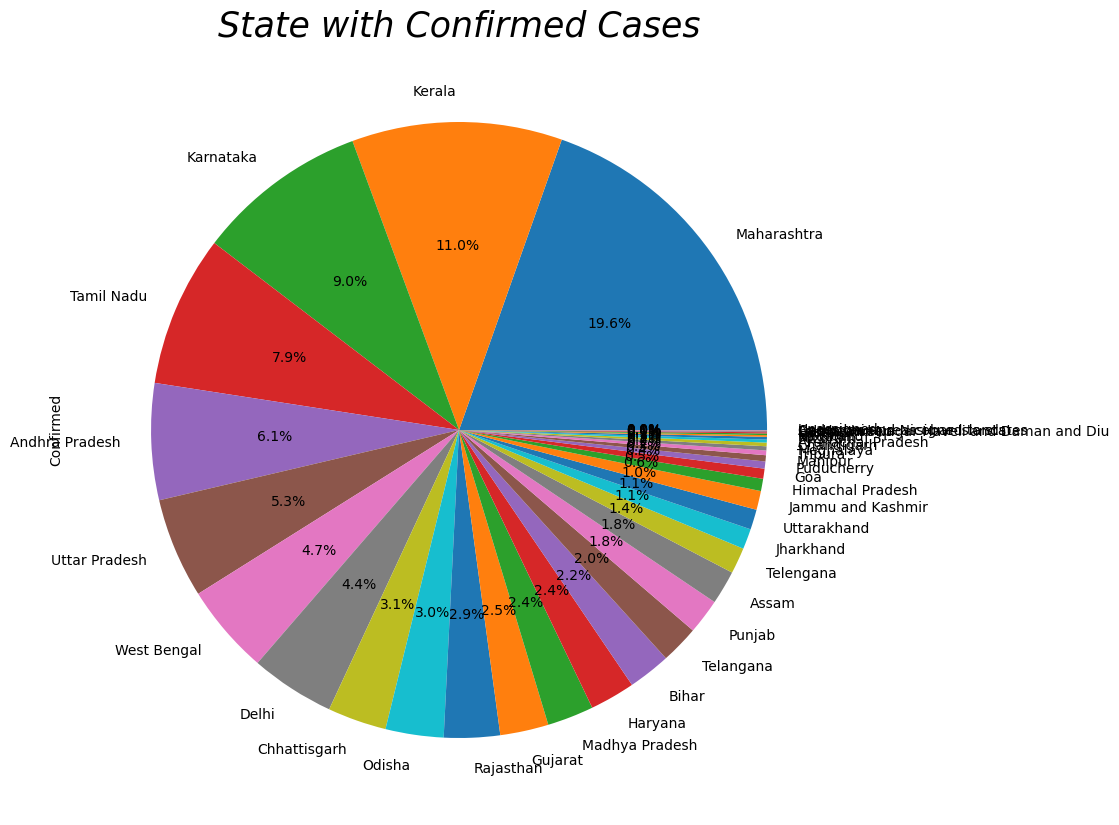

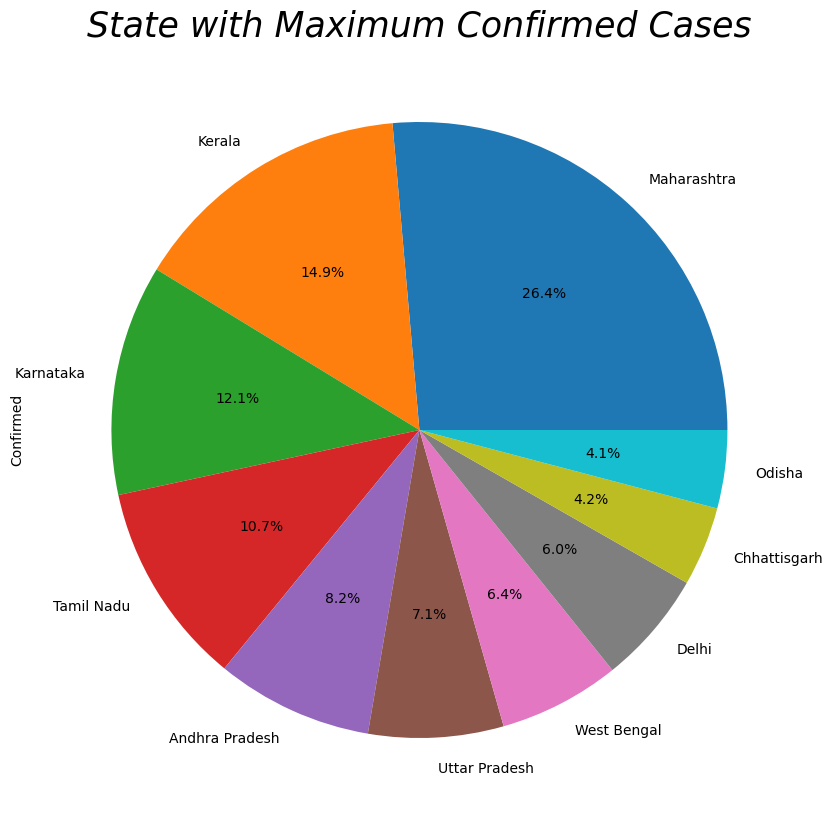

In [49]:
plt.figure(figsize=(20,15))

dfstate1=dfstate.sort_values(["Confirmed"],ascending=False)
dfstate1["Confirmed"].plot(kind="pie",labels=dfstate1['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Confirmed Cases",fontsize=25,fontstyle="oblique")

plt.figure(figsize=(20,15))

dfstateconfirmed.sort_values(["Confirmed"],ascending=False)
dfstateconfirmed["Confirmed"].plot(kind="pie",labels=dfstateconfirmed['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Maximum Confirmed Cases",fontsize=25,fontstyle="oblique")

Description:

This pie chart represent the maximum comfirmed cases of all states and top 10 states for the duration of January-2020 to August-2021.
As we can observe that Maharashtra has maximum cases, it has 19.6% confirmed cases of entire nation and it has 26.4% confirmed cases of top 10 states.
It shows that Maharashta state required maximum medical supplies to tackle pendamic.

### 7.2 Statewise Cured Cases Data (top 10)

In [50]:
dfstatecured=dfstate.sort_values(["Cured"],ascending=False,ignore_index=True)
dfstatecured=dfstatecured.iloc[0:10]

Text(0.5, 1.0, 'State with Maximum Cured Cases')

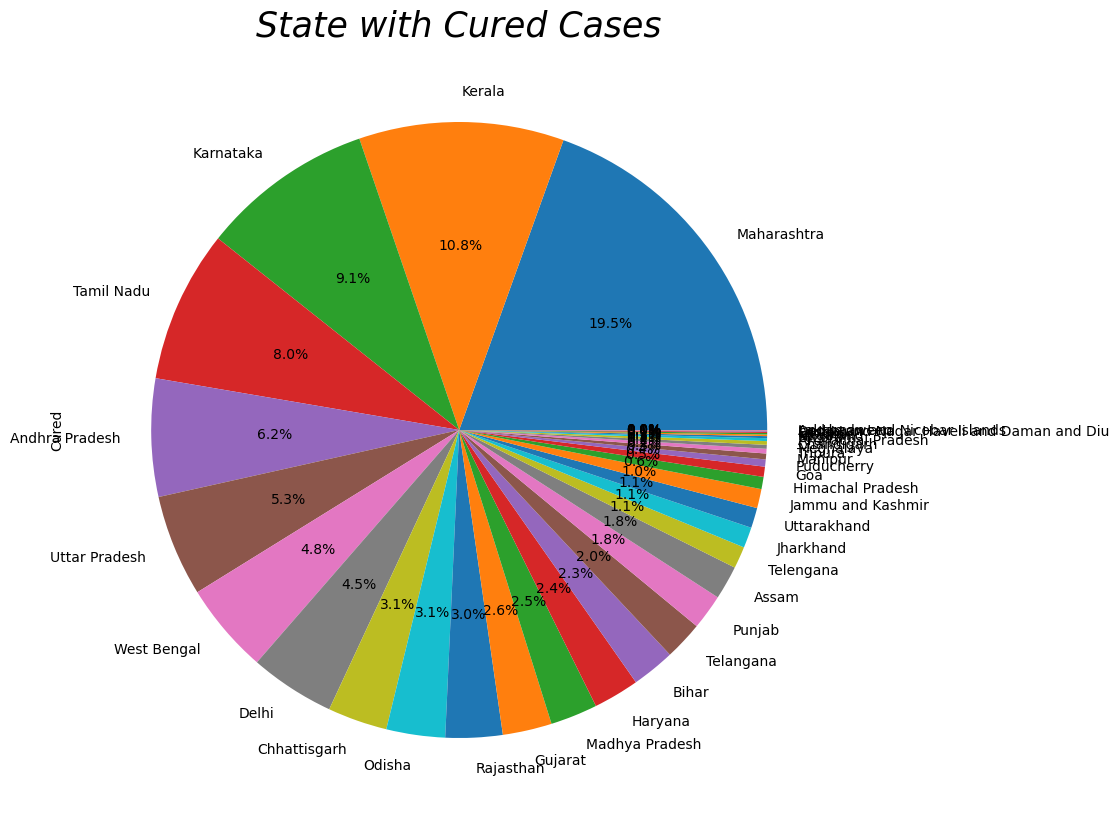

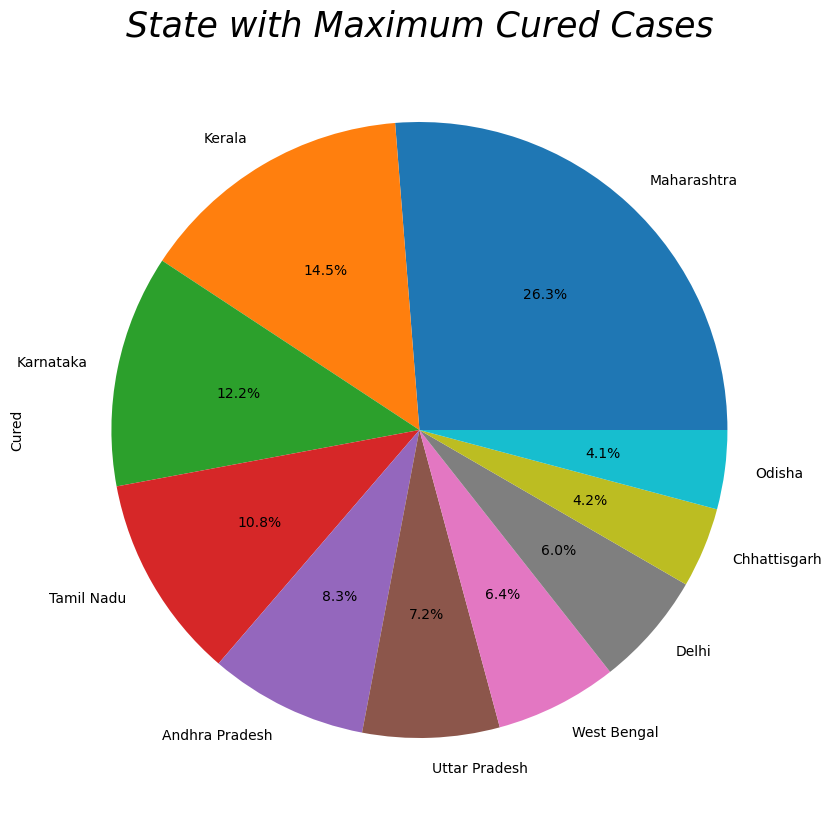

In [51]:
plt.figure(figsize=(20,15))

dfstate1=dfstate.sort_values(["Cured"],ascending=False)
dfstate1["Cured"].plot(kind="pie",labels=dfstate1['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Cured Cases",fontsize=25,fontstyle="oblique")

plt.figure(figsize=(20,15))

dfstatecured.sort_values(["Cured"],ascending=False)
dfstatecured["Cured"].plot(kind="pie",labels=dfstatecured['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Maximum Cured Cases",fontsize=25,fontstyle="oblique")

Description:

This pie chart represent the maximum cured cases of all states and top 10 states for the duration of January-2020 to August-2021.
As we can observe that Maharashtra has maximum cured cases, it has 19.5% cured cases of entire nation and it has 26.3% cured cases of top 10 states.
It shows that Maharashta state is putting good efforts to handle pendamic.

### 7.3 Statewise Deaths Cases Data (top 10)

In [52]:
dfstatedeaths=dfstate.sort_values(["Deaths"],ascending=False,ignore_index=True)
dfstatedeaths=dfstatedeaths.iloc[0:10]

Text(0.5, 1.0, 'State with Maximum Deaths Cases')

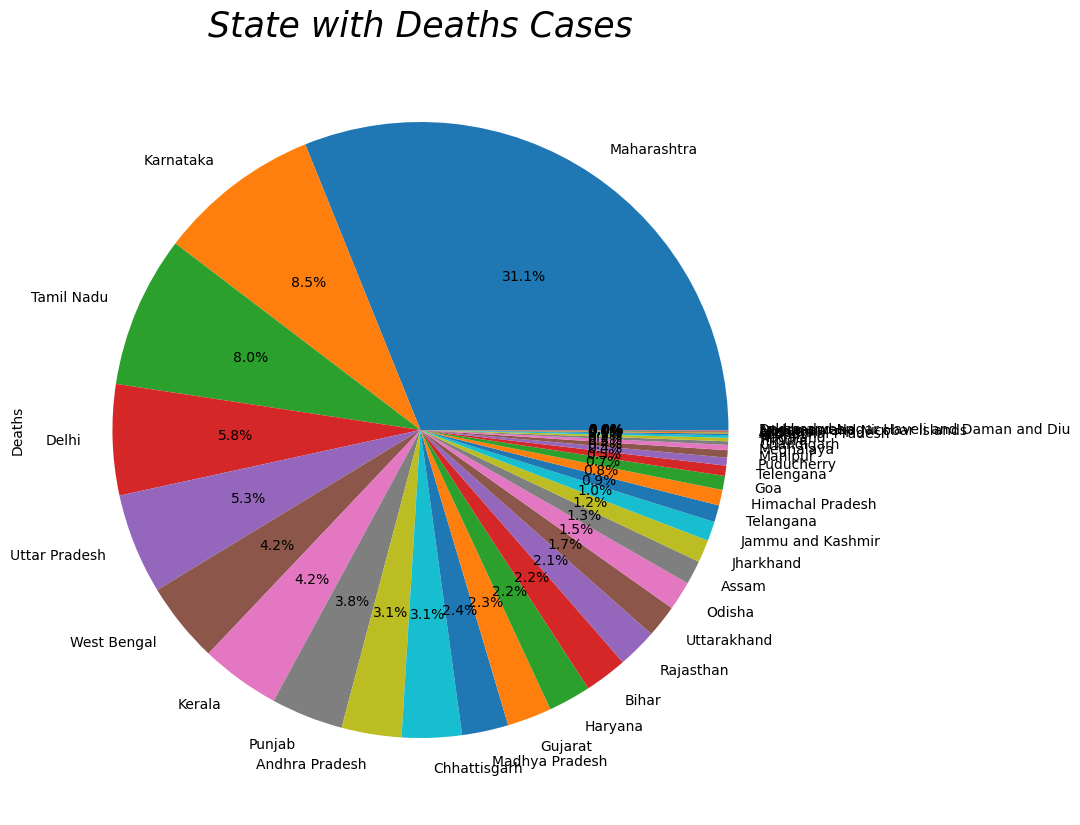

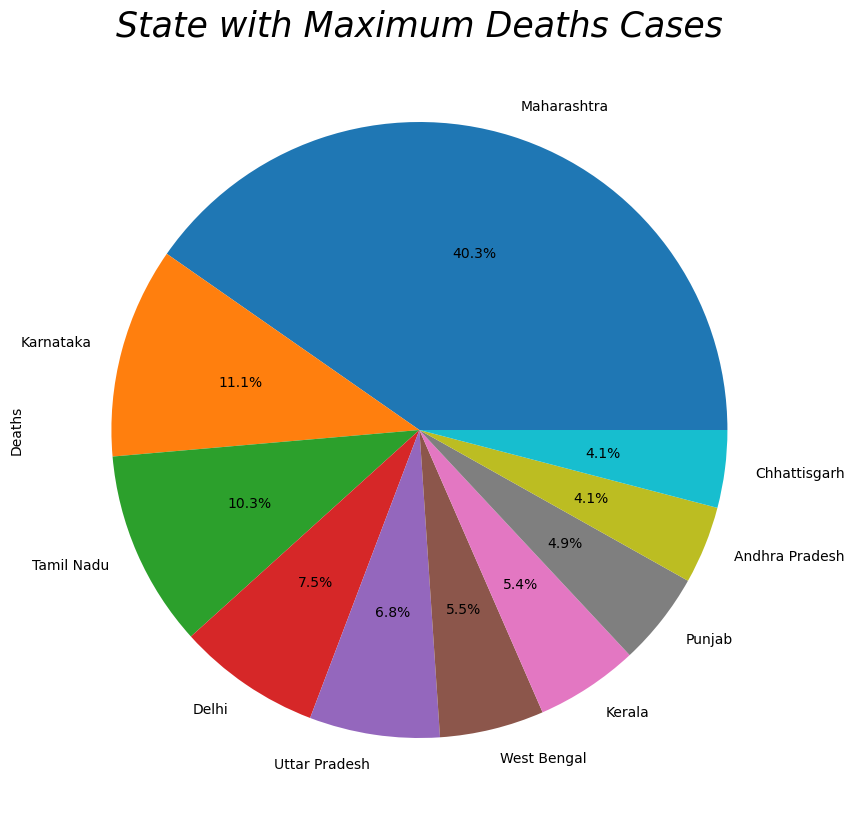

In [53]:
plt.figure(figsize=(20,15))

dfstate1=dfstate.sort_values(["Deaths"],ascending=False)
dfstate1["Deaths"].plot(kind="pie",labels=dfstate1['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Deaths Cases",fontsize=25,fontstyle="oblique")

plt.figure(figsize=(20,15))

dfstatedeaths.sort_values(["Deaths"],ascending=False)
dfstatedeaths["Deaths"].plot(kind="pie",labels=dfstatedeaths['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Maximum Deaths Cases",fontsize=25,fontstyle="oblique")

Description:

This pie chart represent the maximum deaths cases of all states and top 10 states for the duration of January-2020 to August-2021.
As we can observe that Maharashtra has maximum deaths cases, it has 31.1% deaths cases of entire nation and it has 40.3% deaths cases of top 10 states.
The state Kerala was on second position in confirmed cases 14.9 and cured cases 10.8, while in death cases state was on 7th position with 5.4%,it shows that Kerala heath system was able to control death rate in state.

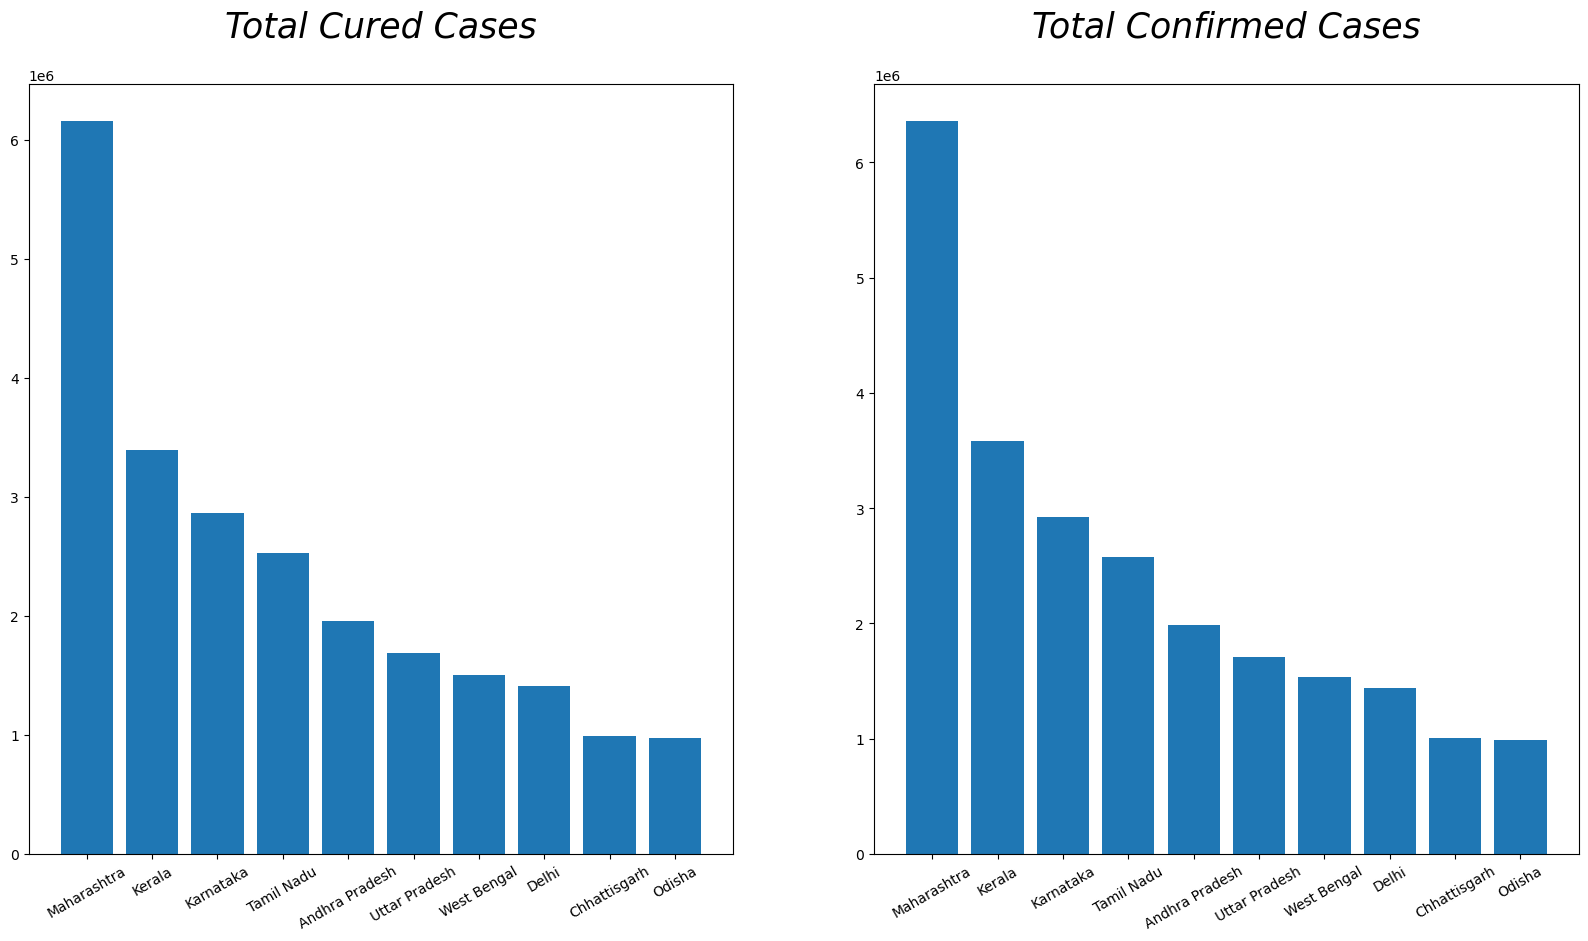

In [54]:
dfstatecured.set_index(dfstatecured['State/UnionTerritory'])

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.bar(dfstatecured['State/UnionTerritory'], dfstatecured["Cured"],align='center')
plt.xticks(dfstatecured['State/UnionTerritory'],rotation="30")
plt.title("Total Cured Cases\n",fontsize=25,fontstyle="oblique")

plt.subplot(1,2,2)
plt.bar(dfstatecured['State/UnionTerritory'], dfstatecured["Confirmed"],align='center')
plt.xticks(dfstatecured['State/UnionTerritory'],rotation="30")
plt.title("Total Confirmed Cases\n",fontsize=25,fontstyle="oblique")
plt.show()

Description:

This bar chart represent the maximum confirmed and cured cases of top 10 states for the duration of January-2020 to August-2021.
y-axis in million

### 8. Plotting Daywise or Datewise Data of Confirmed, Cured, Deaths (Total or Cumulative data)

### 8.1 Monthwise Data of Confirmed, Cured, Deaths

In [55]:
dfmonthwise=df1.sort_values(["Date","State/UnionTerritory"],ignore_index= True)
dfmonthwise=dfmonthwise.groupby(['YYMM'])[['Cured', 'Deaths', 'Confirmed']].max().reset_index()

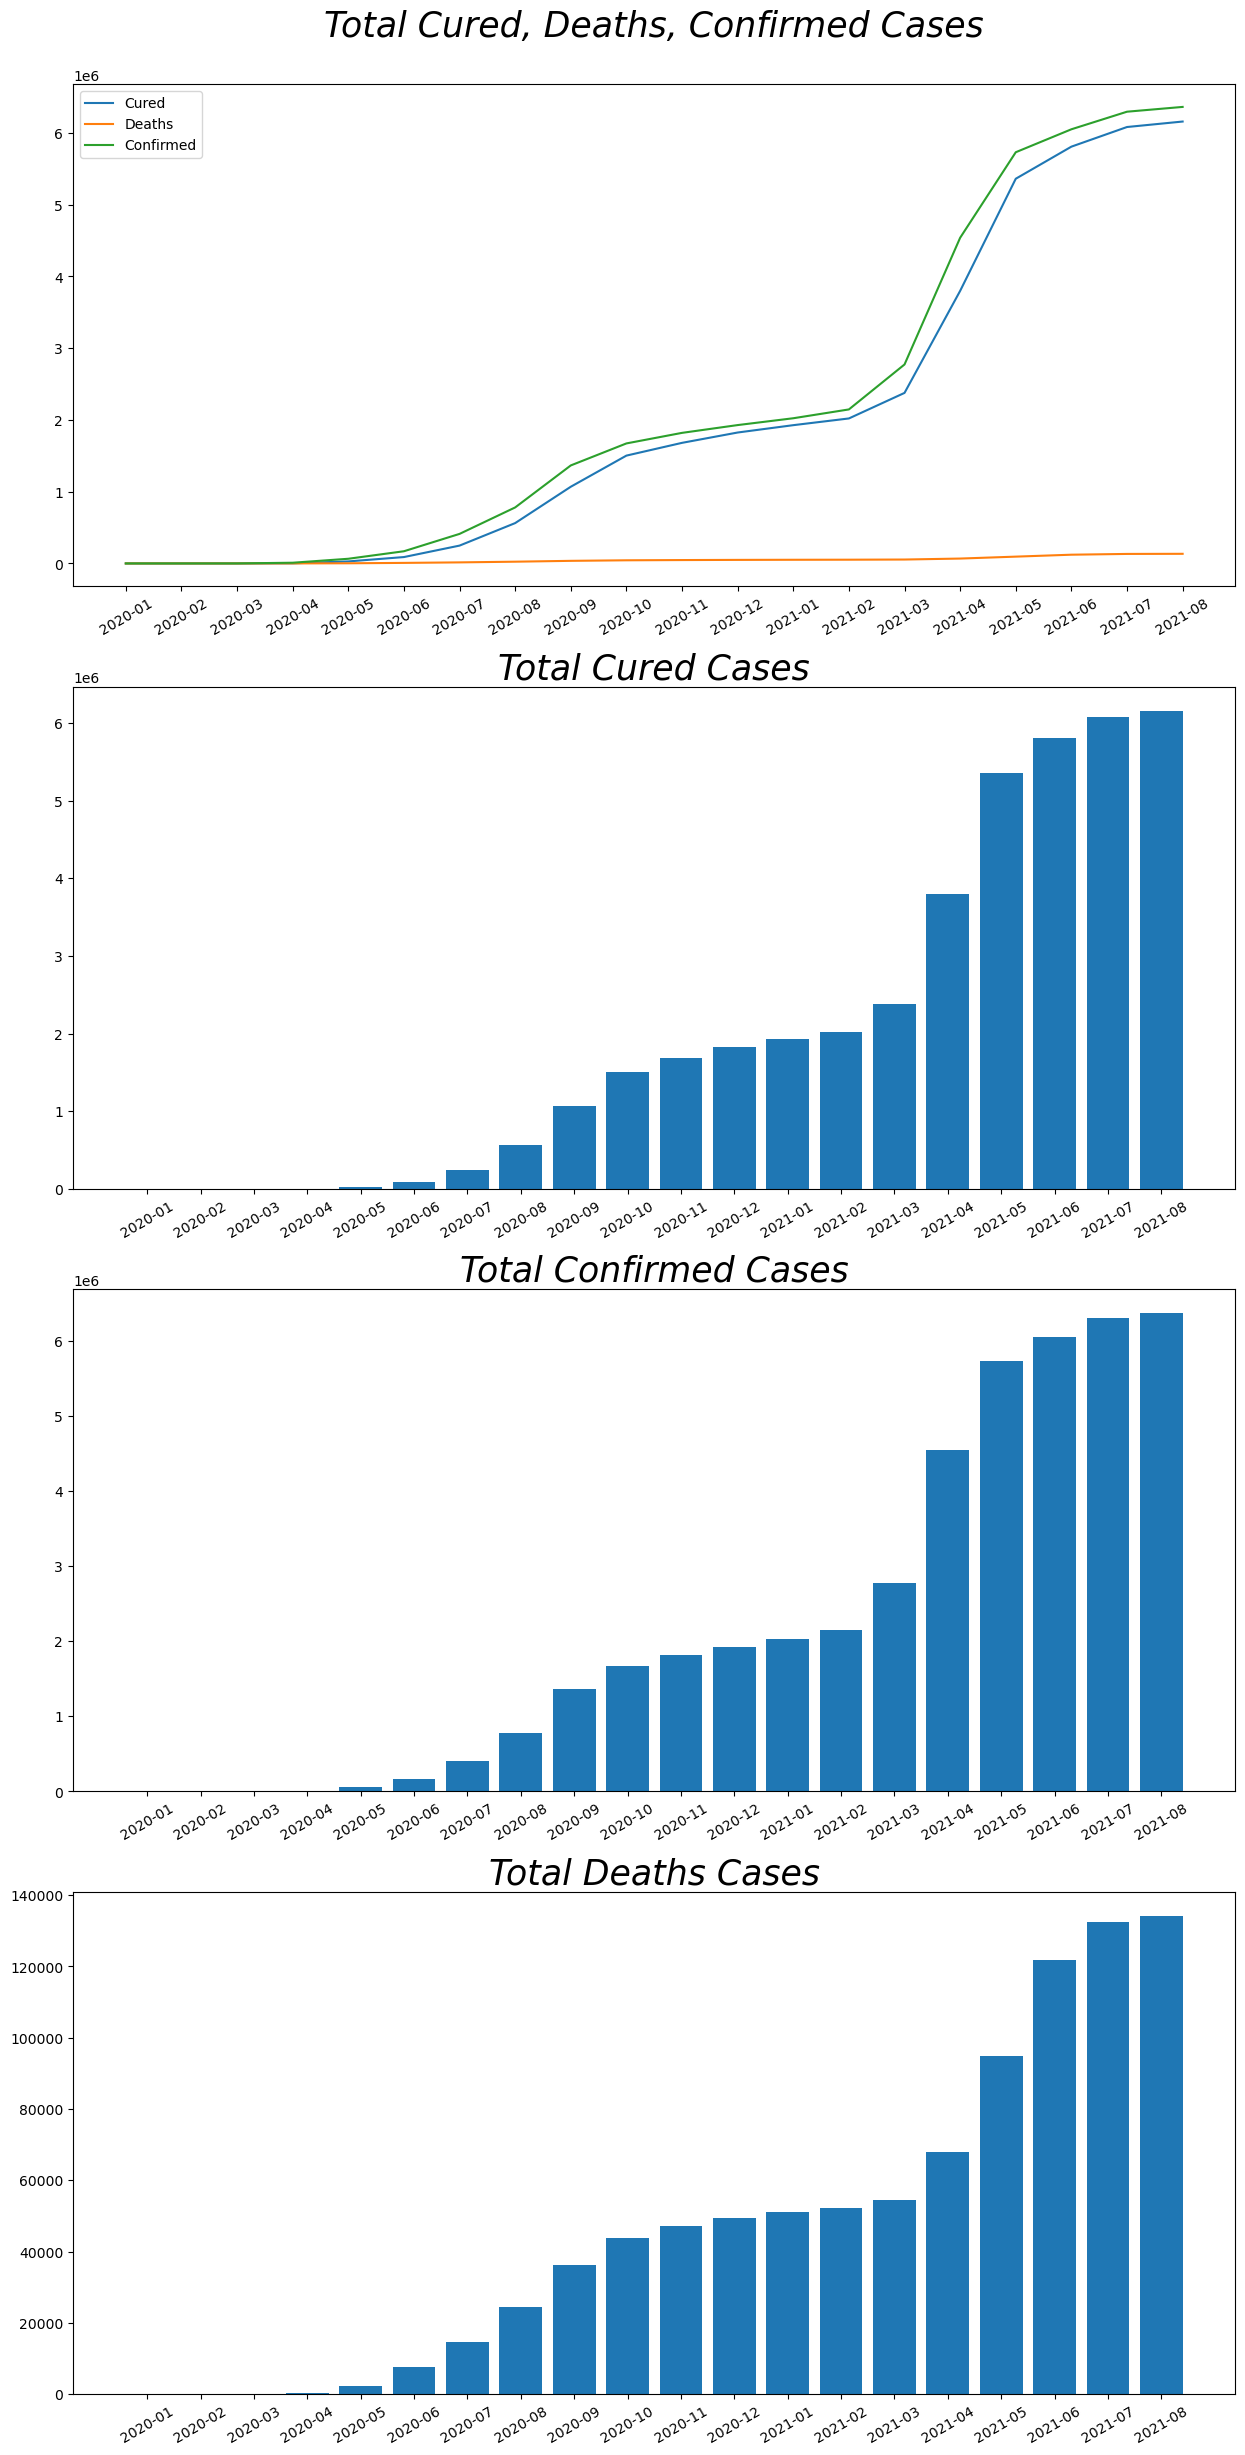

In [56]:
plt.figure(figsize=(15,30))
plt.subplot(4,1,1)
plt.plot(dfmonthwise["YYMM"],dfmonthwise[['Cured','Deaths','Confirmed']])
plt.xticks(dfmonthwise['YYMM'],rotation="30")
plt.legend(['Cured','Deaths','Confirmed'])
plt.title("Total Cured, Deaths, Confirmed Cases\n",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,2)
plt.bar(dfmonthwise['YYMM'], dfmonthwise["Cured"],align='center')
plt.xticks(dfmonthwise['YYMM'],rotation="30")
plt.title("Total Cured Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,3)
plt.bar(dfmonthwise['YYMM'], dfmonthwise["Confirmed"],align='center')
plt.xticks(dfmonthwise['YYMM'],rotation="30")
plt.title("Total Confirmed Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,4)
plt.bar(dfmonthwise['YYMM'], dfmonthwise["Deaths"],align='center')
plt.xticks(dfmonthwise['YYMM'],rotation="30")
plt.title("Total Deaths Cases",fontsize=25,fontstyle="oblique")
plt.show()

Description:

Thses line and bar charts represent the maximum confirmed, cured and deaths cases of all states monthwise for the duration of January-2020 to August-2021.
y-axis in million (except in Deaths cases)
From graph we can see that there is huge difference between confirmed and death cases (ie. confirmed cases are in millions and death cases are in thousands).
During first wave of Covid pendamic there was rapid growth in confirmed cases between June-2020 to Ooctober-2020 and for second wave of Covid pendamic there was rapid growth in confirmed cases between March-2021 to July-2021.

### 8.2 Quarterwise Data of Confirmed, Cured, Deaths

In [77]:
dfqtrwise=df1.sort_values(["Date","State/UnionTerritory"],ignore_index= True)
dfqtrwise=dfqtrwise.groupby(['YYQQ'])[['Cured', 'Deaths', 'Confirmed']].max().reset_index()

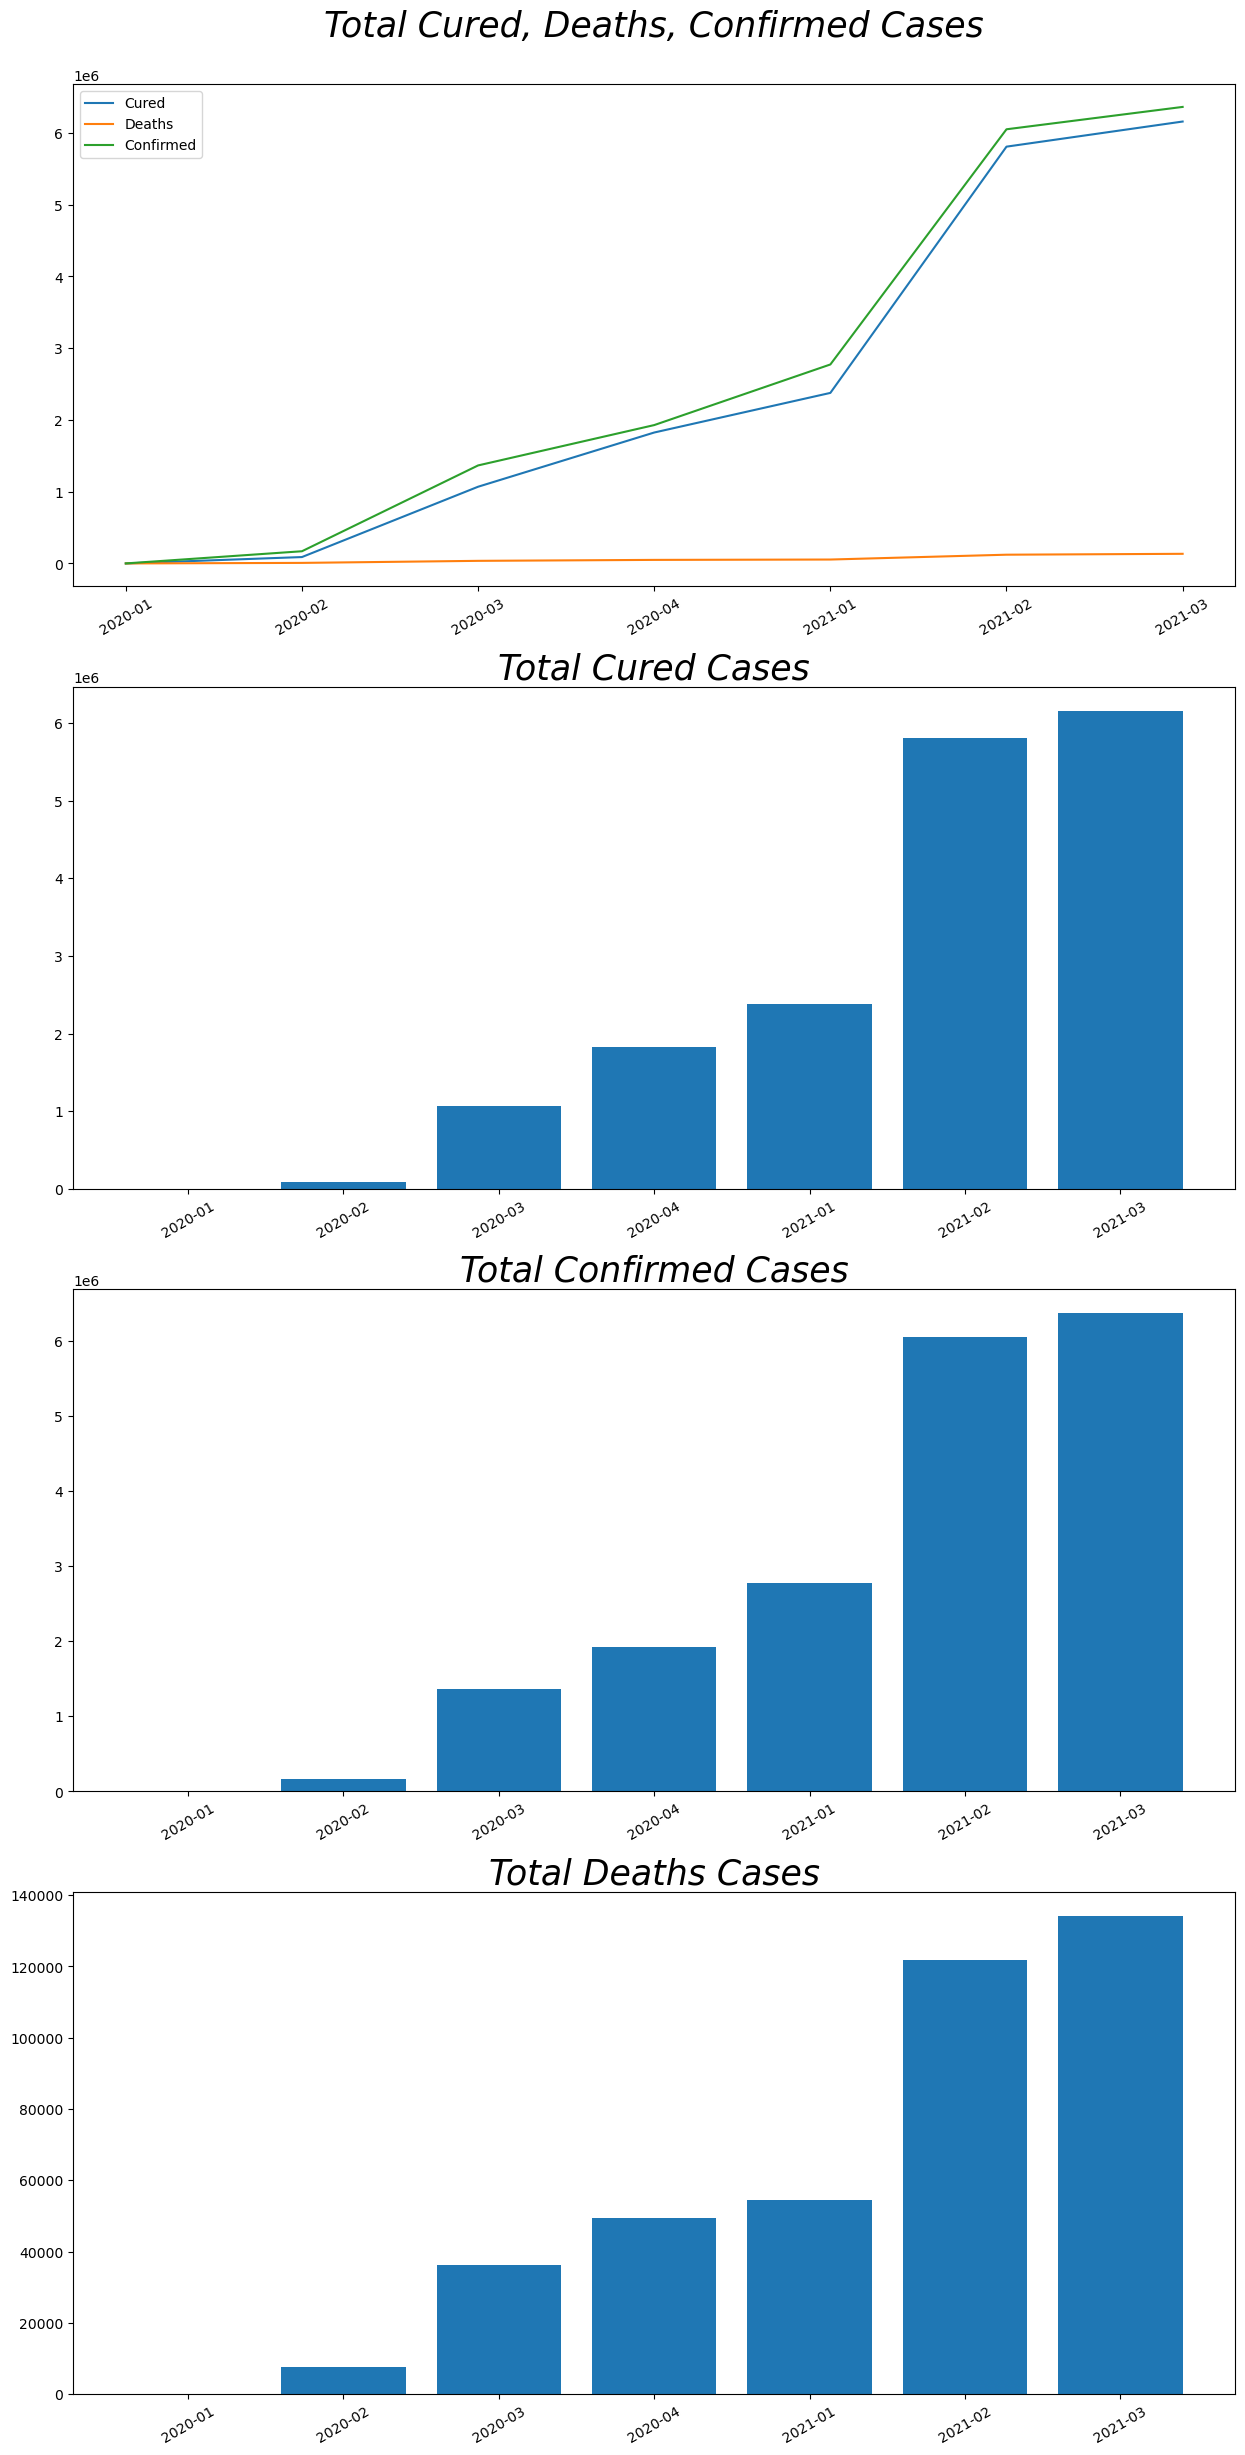

In [78]:
plt.figure(figsize=(15,30))
plt.subplot(4,1,1)
plt.plot(dfqtrwise["YYQQ"],dfqtrwise[['Cured','Deaths','Confirmed']])
plt.xticks(dfqtrwise['YYQQ'],rotation="30")
plt.legend(['Cured','Deaths','Confirmed'])
plt.title("Total Cured, Deaths, Confirmed Cases\n",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,2)
plt.bar(dfqtrwise['YYQQ'], dfqtrwise["Cured"],align='center')
plt.xticks(dfqtrwise['YYQQ'],rotation="30")
plt.title("Total Cured Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,3)
plt.bar(dfqtrwise['YYQQ'], dfqtrwise["Confirmed"],align='center')
plt.xticks(dfqtrwise['YYQQ'],rotation="30")
plt.title("Total Confirmed Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,4)
plt.bar(dfqtrwise['YYQQ'], dfqtrwise["Deaths"],align='center')
plt.xticks(dfqtrwise['YYQQ'],rotation="30")
plt.title("Total Deaths Cases",fontsize=25,fontstyle="oblique")
plt.show()

Description:

Thses line and bar charts represent the maximum confirmed, cured and deaths cases of all states Quarterwise for the duration of Q1-2020 to Q3-2021.
y-axis in million (except in Deaths cases)
From graph we can see that there is huge difference between confirmed and death cases (ie. confirmed cases are in millions and death cases are in thousands).
During first wave of Covid pendamic there was rapid growth in confirmed cases in Q3-2020 and for second wave of Covid pendamic there was rapid growth in confirmed cases in Q2-2021.

### 9. Plotting Statewise Data of Confirmed, Cured, Deaths (Daywise or Daily Data)

In [79]:
df1.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed',
       'ActiveCases', 'CuredDaily', 'DeathsDaily', 'ConfirmedDaily',
       'ActiveDaily', 'Day', 'Month', 'Year', 'Qtr', 'YYMM', 'YYQQ'],
      dtype='object')

In [60]:
dfstatedaily=df1.groupby(['State/UnionTerritory'])[['CuredDaily', 'DeathsDaily', 'ConfirmedDaily']].mean().reset_index()
dfstatedaily.columns

Index(['State/UnionTerritory', 'CuredDaily', 'DeathsDaily', 'ConfirmedDaily'], dtype='object')

In [80]:
dfstatedaily

,State/UnionTerritory,CuredDaily,DeathsDaily,ConfirmedDaily
0,Andaman and Nicobar Islands,14.706349,0.255952,15.065476
1,Andhra Pradesh,3769.760618,26.185328,3832.395753
2,Arunachal Pradesh,96.413306,0.500000,102.024194
3,Assam,1123.863454,10.883534,1159.096386
4,Bihar,1408.173228,18.986220,1430.714567
5,Cases being reassigned to states,0.000000,0.000000,197.933333
6,Chandigarh,119.667319,1.587084,121.313112
7,Chhattisgarh,1933.833659,26.504892,1963.512720
8,Dadra and Nagar Haveli and Daman and Diu,22.948276,0.008621,23.010776
9,Delhi,2672.878788,47.477273,2741.562500


### 9.1 Statewise Confirmed Cases Data (top 10) (for Daily Cases)

In [61]:
dfstateconfirmeddaily=dfstatedaily.sort_values(["ConfirmedDaily"],ascending=False,ignore_index=True)
dfstateconfirmeddaily=dfstateconfirmeddaily.iloc[0:10]

Text(0.5, 1.0, 'State with Mamimum Confirmed Daily Cases')

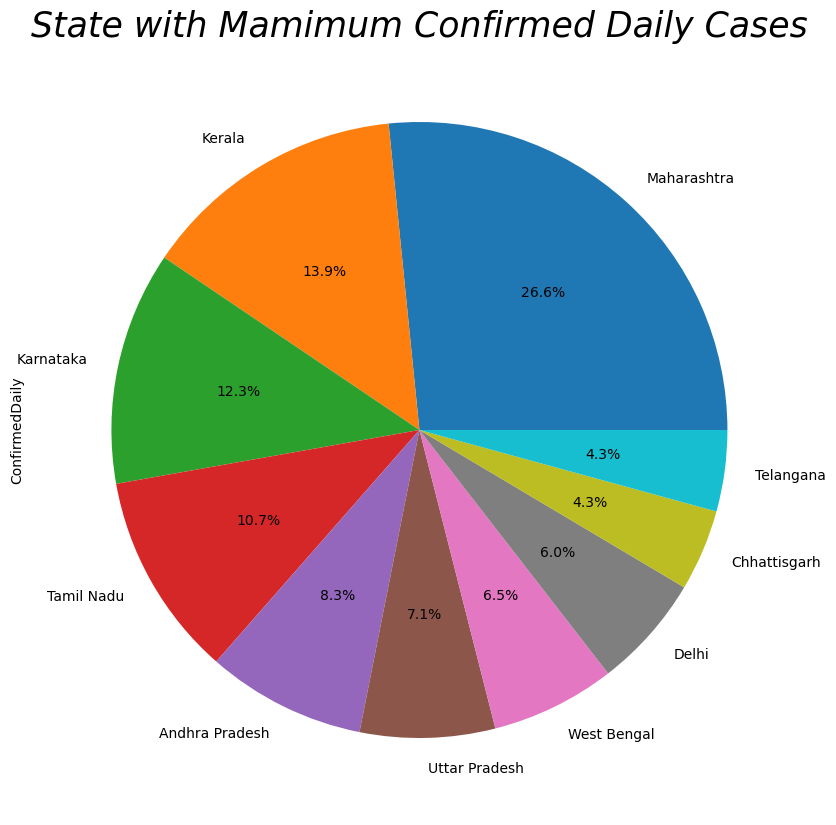

In [62]:
plt.figure(figsize=(20,15))

dfstateconfirmeddaily.sort_values(["ConfirmedDaily"],ascending=False)
dfstateconfirmeddaily["ConfirmedDaily"].plot(kind="pie",labels=dfstateconfirmeddaily['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Mamimum Confirmed Daily Cases",fontsize=25,fontstyle="oblique")

Description:

This pie chart represent the Mean comfirmed cases of top 10 states for the duration of January-2020 to August-2021.
As we can observe that Maharashtra has maximum daily mean cases, it has 26.6% confirmed daily mean cases of top 10 states.
Important thing to notice that as per maximum cases Odisha was in top 10 state while as per average maximum daily cases Telangana took position of Odisha.
There are minor changes in percentage of all states compare to maximum cases.

### 9.2 Statewise Cured Cases Data (top 10) (for Daily Cases)

In [63]:
dfstatecureddaily=dfstatedaily.sort_values(["CuredDaily"],ascending=False,ignore_index=True)
dfstatecureddaily=dfstatecureddaily.iloc[0:10]

Text(0.5, 1.0, 'State with Mamimum Cured Daily Cases')

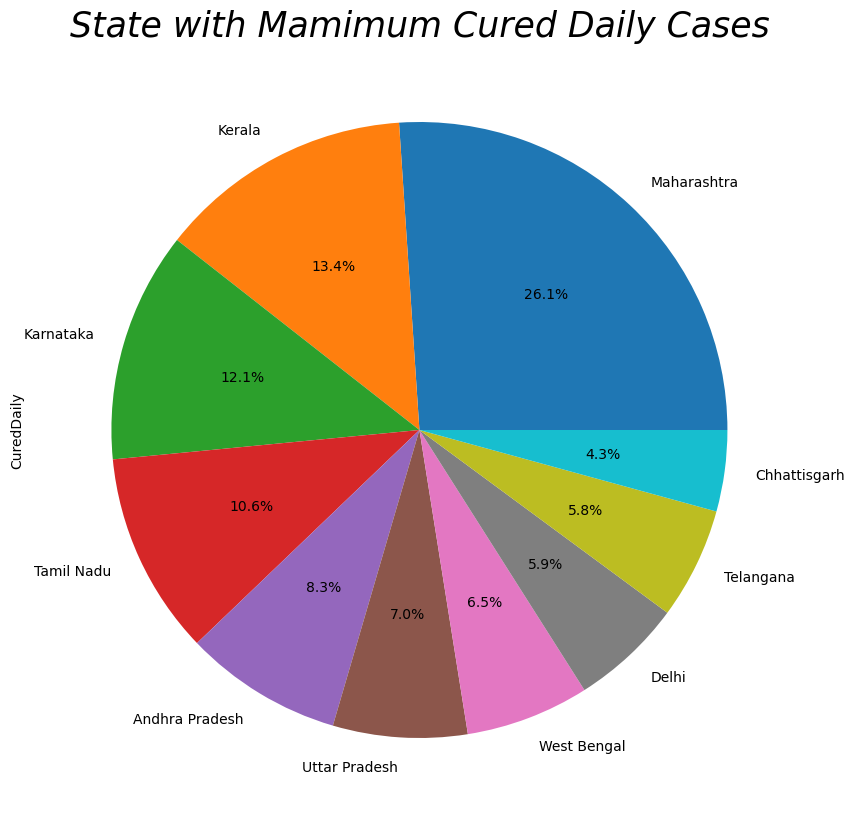

In [64]:
plt.figure(figsize=(20,15))

dfstatecureddaily.sort_values(["CuredDaily"],ascending=False)
dfstatecureddaily["CuredDaily"].plot(kind="pie",labels=dfstatecureddaily['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Mamimum Cured Daily Cases",fontsize=25,fontstyle="oblique")

Description

This pie chart represent the Mean cured cases of top 10 states for the duration of January-2020 to August-2021.
As we can observe that Maharashtra has maximum daily mean cases, it has 26.1% cured daily mean cases of top 10 states.
Important thing to notice that as per maximum cases Odisha was in top 10 state while as per average maximum daily cases Telangana took 9th position and Chhattisgarh was on 10th position.
There are minor changes in percentage of all states compare to maximum cases.

### 9.3 Statewise Deaths Cases Data (top 10) (for Daily Cases)

In [65]:
dfstatedeathdaily=dfstatedaily.sort_values(["DeathsDaily"],ascending=False,ignore_index=True)
dfstatedeathdaily=dfstatedeathdaily.iloc[0:10]

Text(0.5, 1.0, 'State with Mamimum Deaths Daily Cases')

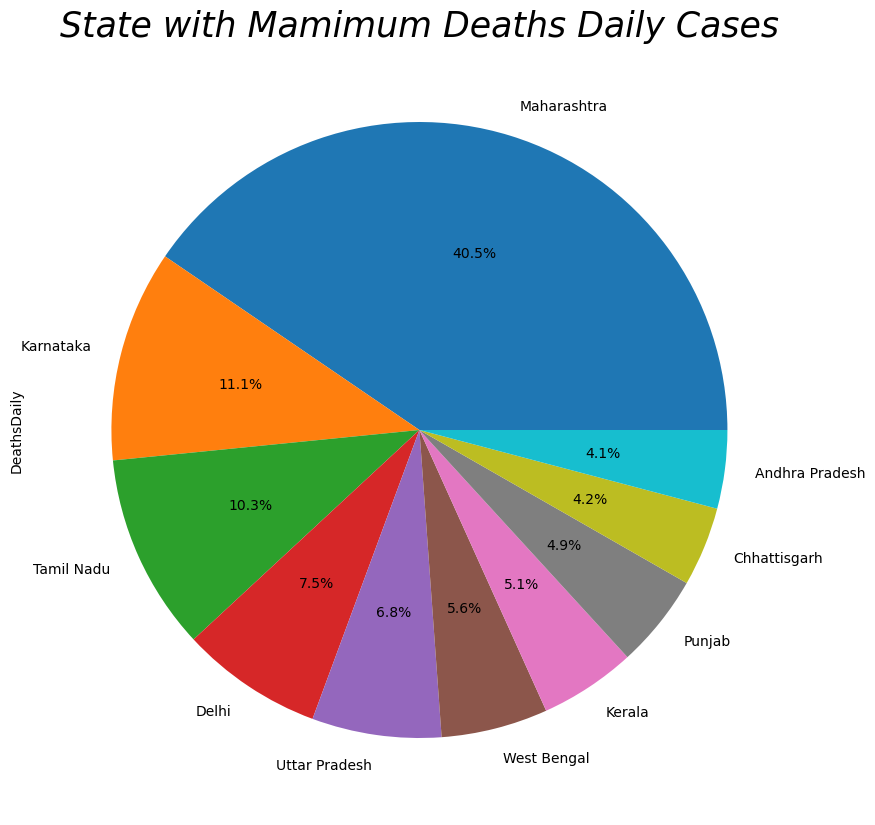

In [66]:
plt.figure(figsize=(20,15))

dfstatedeathdaily.sort_values(["DeathsDaily"],ascending=False)
dfstatedeathdaily["DeathsDaily"].plot(kind="pie",labels=dfstatedeathdaily['State/UnionTerritory'],figsize=(15,10),autopct='%0.01f%%')
plt.title("State with Mamimum Deaths Daily Cases",fontsize=25,fontstyle="oblique")

Description:

This pie chart represent the Mean deaths cases of top 10 states for the duration of January-2020 to August-2021.
As we can observe that Maharashtra has maximum daily mean cases, it has 40.5% cured daily mean cases of top 10 states.
There are minor changes in percentage of all states compare to maximum cases.

### 10. Plotting Daywise or Datewise Data of Confirmed, Cured, Deaths (for Daily Cases)

### 10.1 Monthwise Data of Confirmed, Cured, Deaths (for Daily Cases)

In [67]:
dfmonthwise1=df1.sort_values(["Date","State/UnionTerritory"],ignore_index= True)
dfmonthwise1=dfmonthwise1.groupby(['YYMM'])[['CuredDaily', 'DeathsDaily', 'ConfirmedDaily']].mean().reset_index()

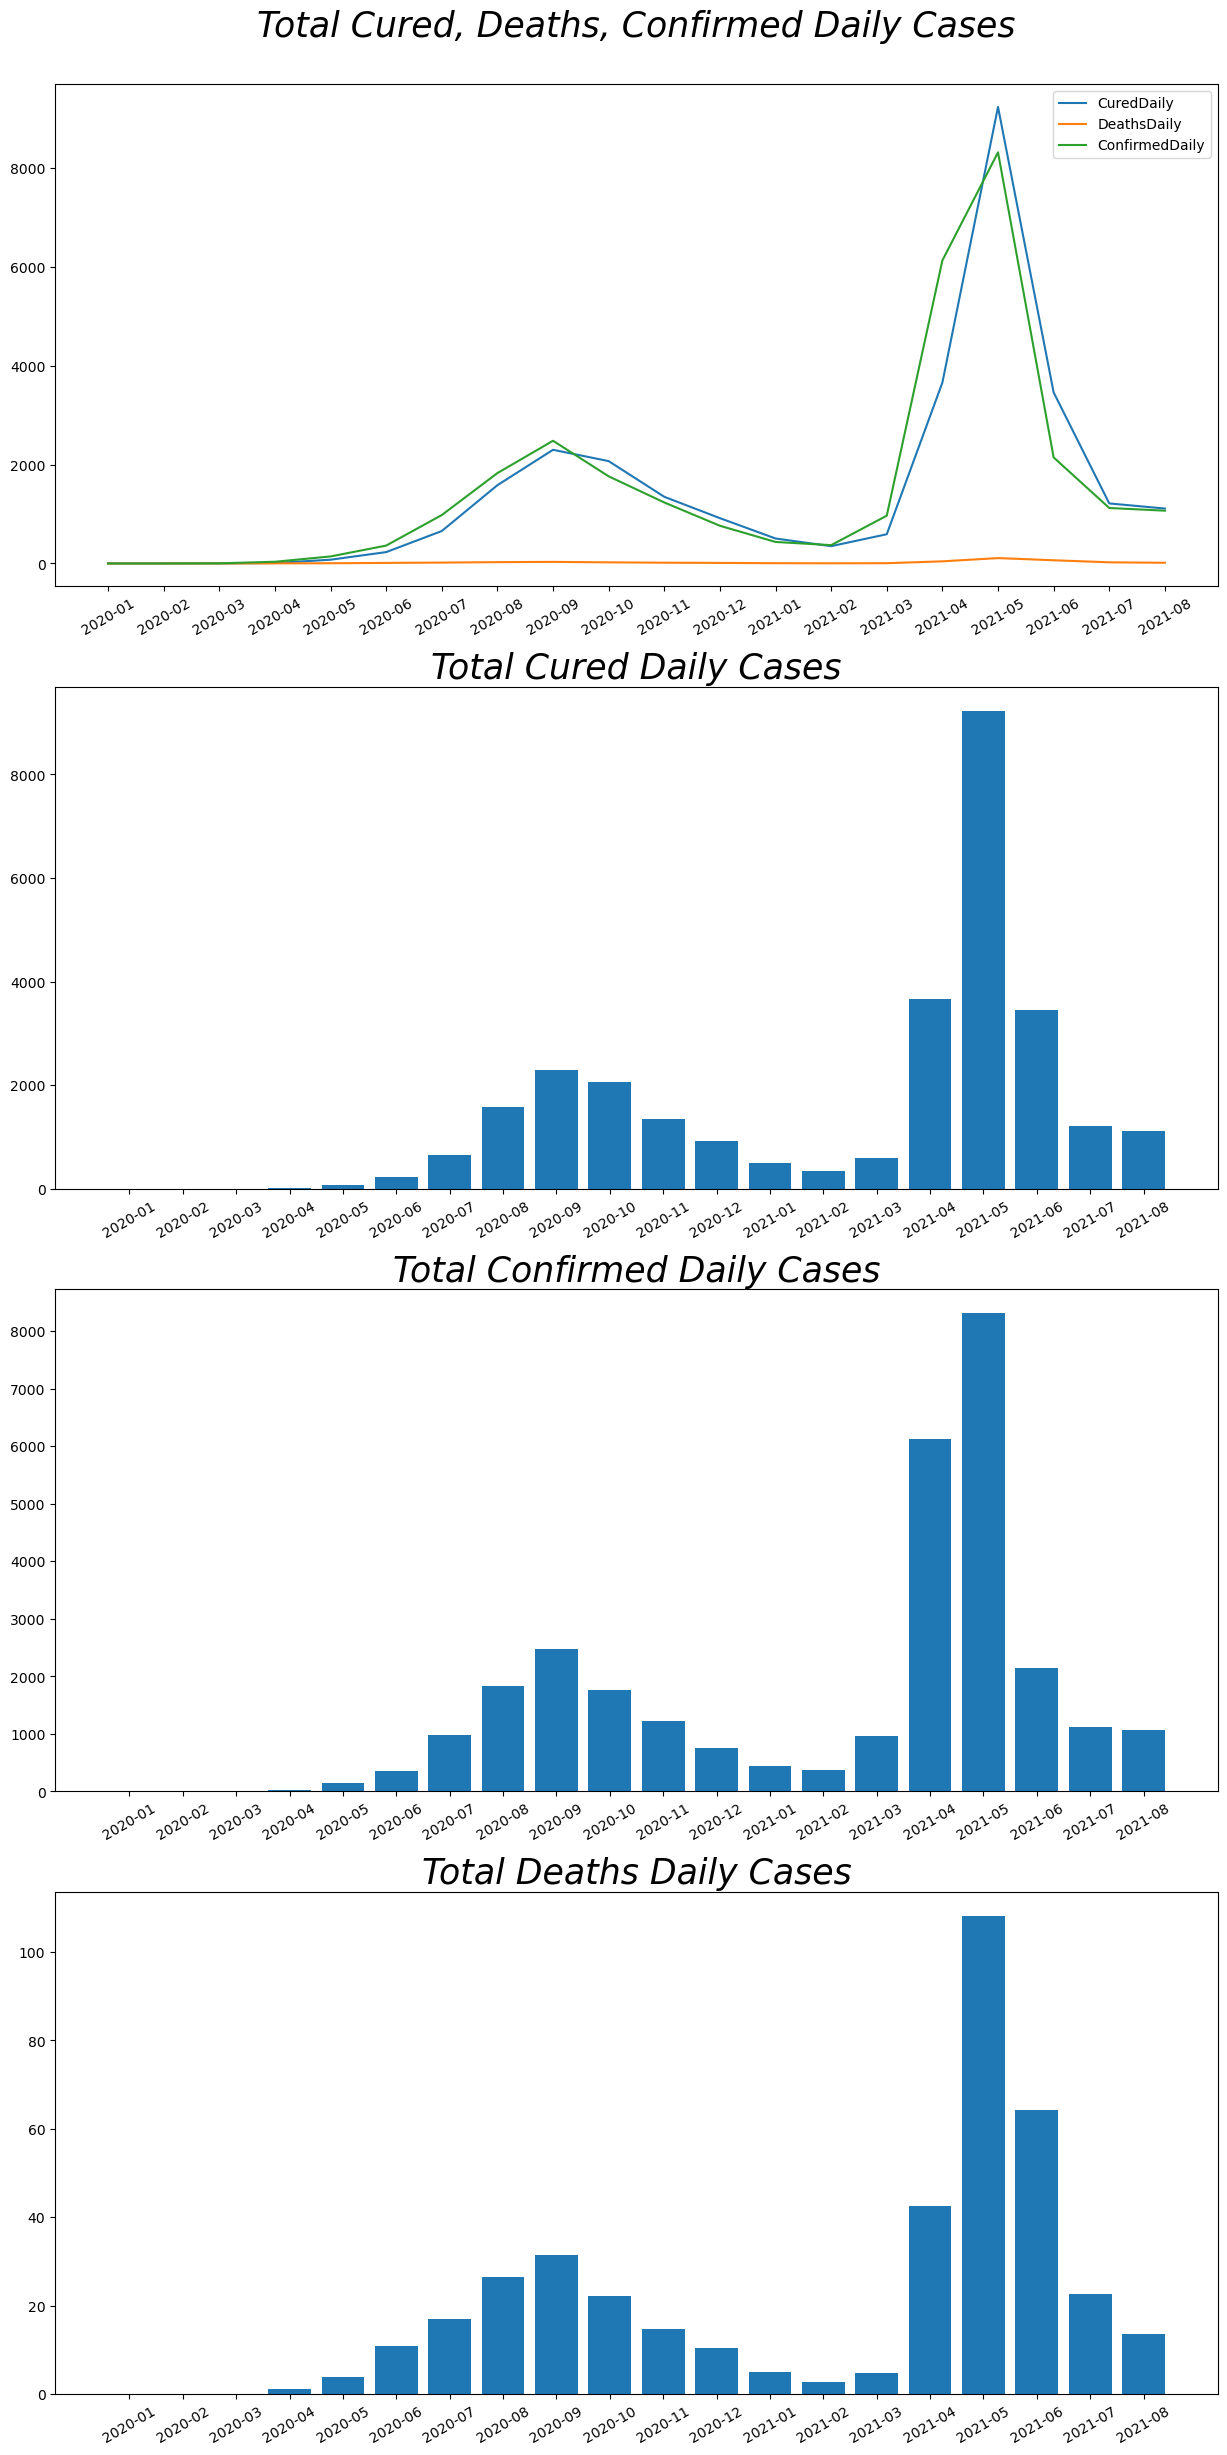

In [68]:
plt.figure(figsize=(15,30))
plt.subplot(4,1,1)
plt.plot(dfmonthwise1["YYMM"],dfmonthwise1[['CuredDaily','DeathsDaily','ConfirmedDaily']])
plt.xticks(dfmonthwise1['YYMM'],rotation="30")
plt.legend(['CuredDaily','DeathsDaily','ConfirmedDaily'])
plt.title("Total Cured, Deaths, Confirmed Daily Cases\n",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,2)
plt.bar(dfmonthwise1['YYMM'], dfmonthwise1["CuredDaily"],align='center')
plt.xticks(dfmonthwise1['YYMM'],rotation="30")
plt.title("Total Cured Daily Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,3)
plt.bar(dfmonthwise1['YYMM'], dfmonthwise1["ConfirmedDaily"],align='center')
plt.xticks(dfmonthwise1['YYMM'],rotation="30")
plt.title("Total Confirmed Daily Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,4)
plt.bar(dfmonthwise1['YYMM'], dfmonthwise1["DeathsDaily"],align='center')
plt.xticks(dfmonthwise1['YYMM'],rotation="30")
plt.title("Total Deaths Daily Cases",fontsize=25,fontstyle="oblique")
plt.show()


Description:

Thses line and bar charts represent the maximum confirmed, cured and deaths daily cases of all states monthwise for the duration of January-2020 to August-2021.
From graph we can see that there is huge difference between confirmed and death daily cases (ie. confirmed daily cases are in thousands and death daily cases are in hundreds).
During first wave of Covid pendamic, in the month of September-2020 there was maximum confirmed, cured and deaths daily cases and for second wave of Covid pendamic, in the month of May-2021 there was maximum confirmed, cured and deaths daily cases.

### 10.2 Quaterwise Data of Confirmed, Cured, Deaths (for Daily Cases)

In [69]:
dfqtrwise1=df1.sort_values(["Date","State/UnionTerritory"],ignore_index= True)
dfqtrwise1=dfqtrwise1.groupby(['YYQQ'])[['CuredDaily', 'DeathsDaily', 'ConfirmedDaily']].mean().reset_index()

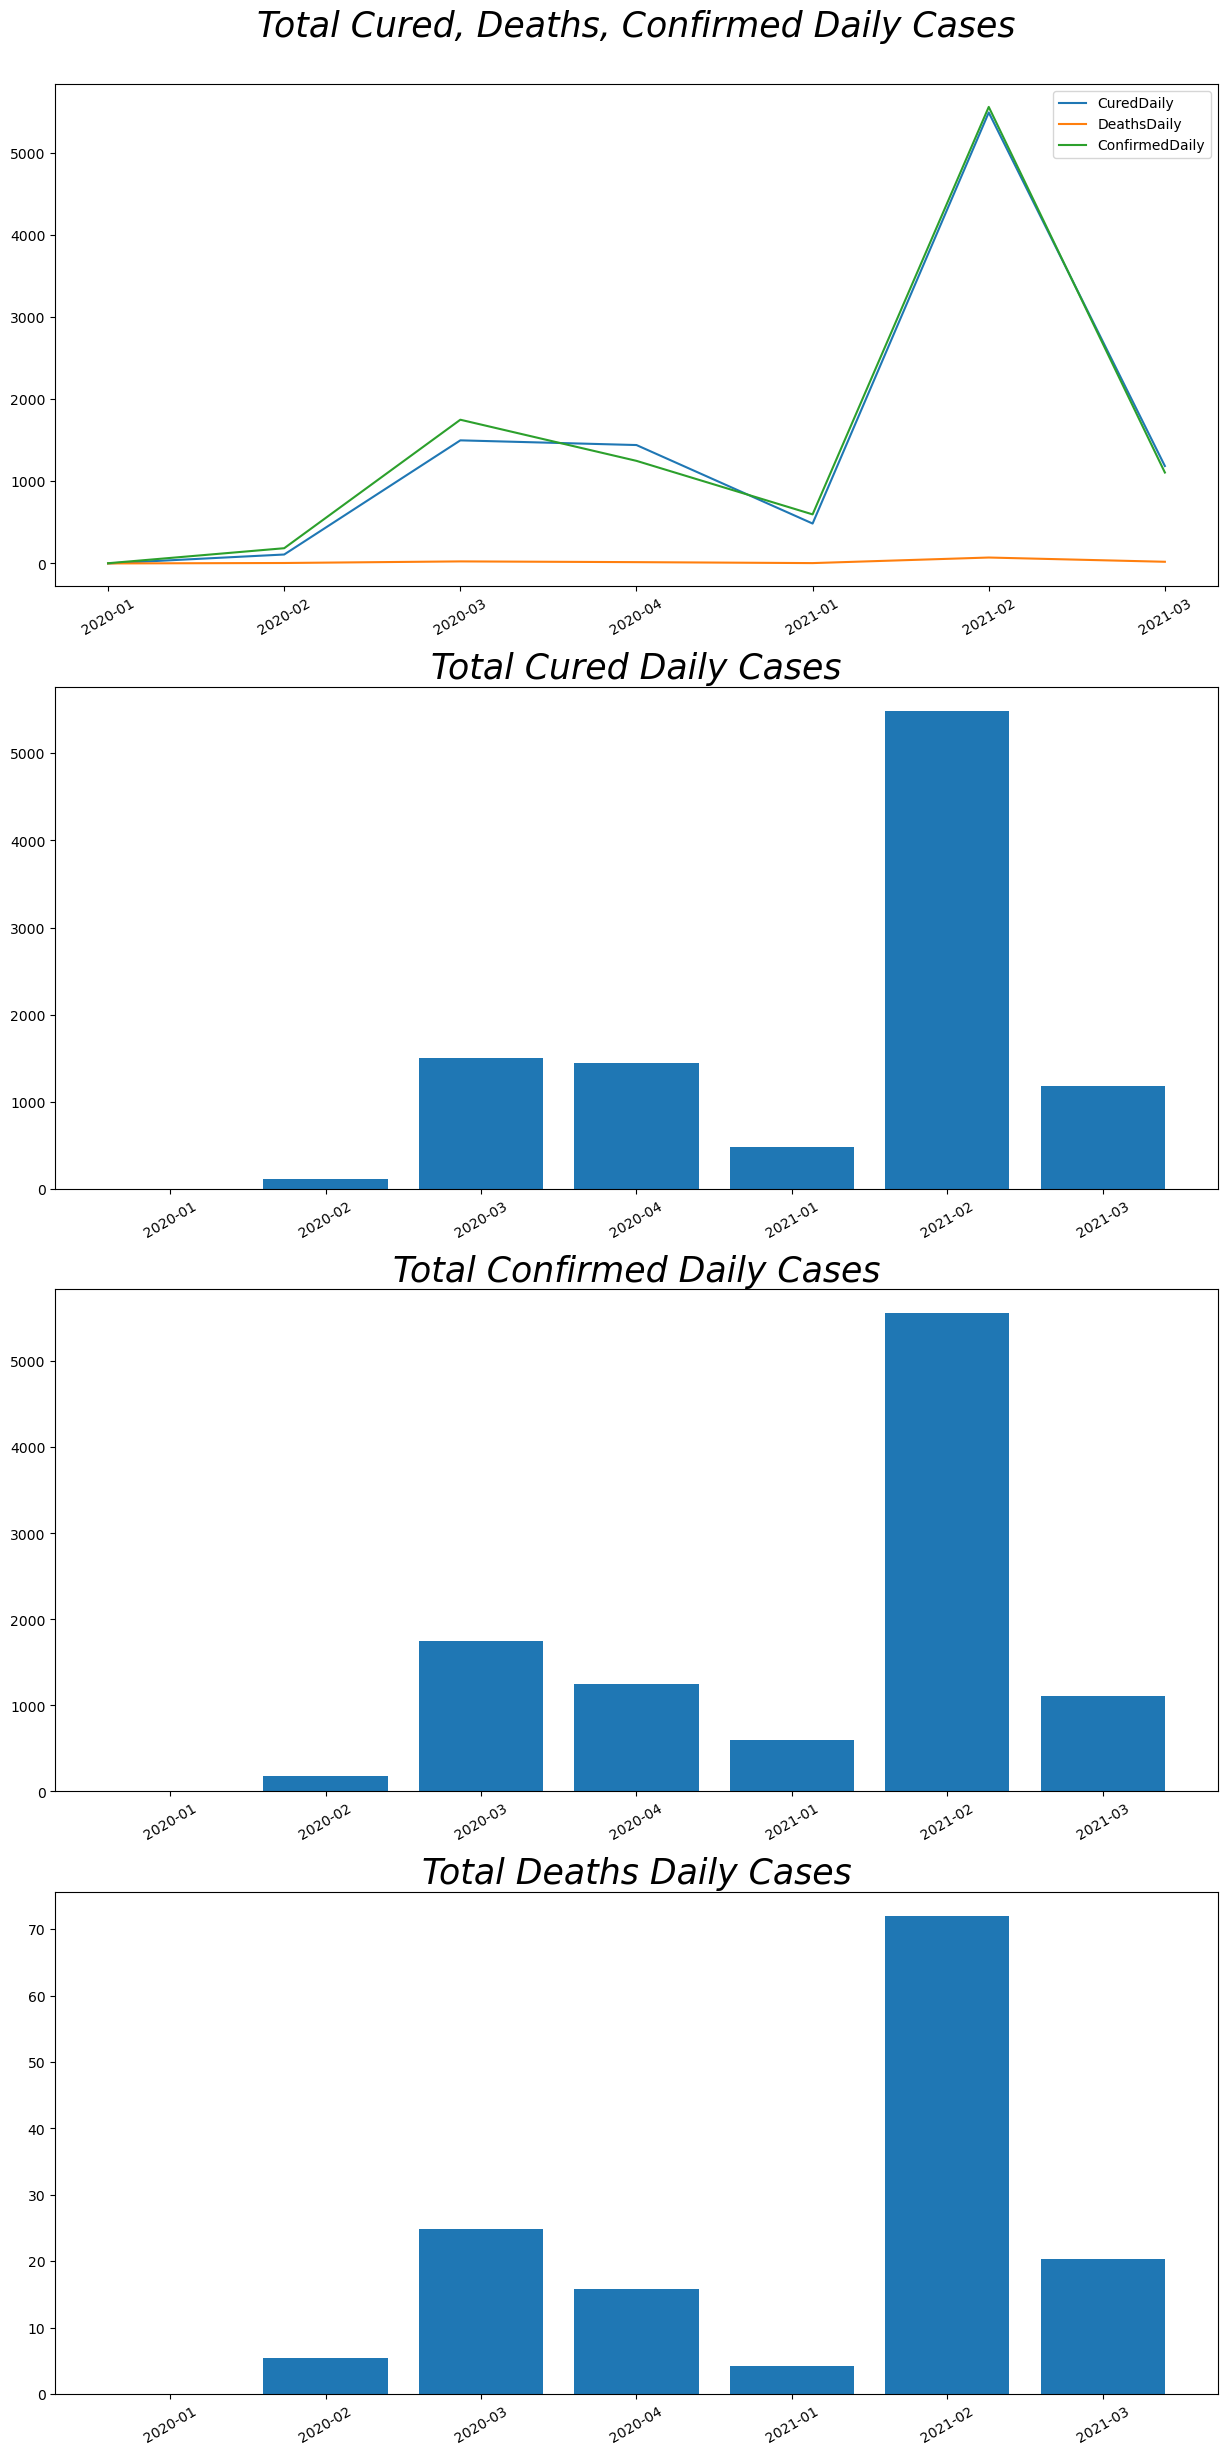

In [70]:
plt.figure(figsize=(15,30))
plt.subplot(4,1,1)
plt.plot(dfqtrwise1["YYQQ"],dfqtrwise1[['CuredDaily','DeathsDaily','ConfirmedDaily']])
plt.xticks(dfqtrwise1["YYQQ"],rotation="30")
plt.legend(['CuredDaily','DeathsDaily','ConfirmedDaily'])
plt.title("Total Cured, Deaths, Confirmed Daily Cases\n",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,2)
plt.bar(dfqtrwise1["YYQQ"], dfqtrwise1["CuredDaily"],align='center')
plt.xticks(dfqtrwise1["YYQQ"],rotation="30")
plt.title("Total Cured Daily Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,3)
plt.bar(dfqtrwise1["YYQQ"], dfqtrwise1["ConfirmedDaily"],align='center')
plt.xticks(dfqtrwise1["YYQQ"],rotation="30")
plt.title("Total Confirmed Daily Cases",fontsize=25,fontstyle="oblique")

plt.subplot(4,1,4)
plt.bar(dfqtrwise1["YYQQ"], dfqtrwise1["DeathsDaily"],align='center')
plt.xticks(dfqtrwise1["YYQQ"],rotation="30")
plt.title("Total Deaths Daily Cases",fontsize=25,fontstyle="oblique")
plt.show()

Description:

Thses line and bar charts represent the maximum confirmed, cured and deaths daily cases of all states quaterwise for the duration of January-2020 to August-2021.
From graph we can see that there is huge difference between confirmed and death daily cases (ie. confirmed daily cases are in thousands and death daily cases are in hundreds).
During first wave of Covid pendamic, in the Q3-2020 there was maximum confirmed, cured and deaths daily cases and for second wave of Covid pendamic, in the Q2-2021 there was maximum confirmed, cured and deaths daily cases.

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18111 entries, 0 to 18110
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  18111 non-null  datetime64[ns]
 1   State/UnionTerritory  18111 non-null  object        
 2   Cured                 18111 non-null  int64         
 3   Deaths                18111 non-null  int64         
 4   Confirmed             18111 non-null  int64         
 5   ActiveCases           18111 non-null  int64         
 6   CuredDaily            18111 non-null  int64         
 7   DeathsDaily           18111 non-null  int64         
 8   ConfirmedDaily        18111 non-null  int64         
 9   ActiveDaily           18111 non-null  int64         
 10  Day                   18111 non-null  object        
 11  Month                 18111 non-null  object        
 12  Year                  18111 non-null  object        
 13  Qtr             